In [ ]:
import matplotlib.pyplot as plt
import time

from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, GRU, Bidirectional, LSTM

# Підготовча частина

Для чистоти експерименту гіперпараметри будуть однаковими для усіх моделей, щоб вони були репрезентативні скористаємось вже наданими у конспекті

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


# Проста GRU

In [ ]:
gru_model = Sequential([
    Embedding(max_features, 32),
    GRU(32),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
start = time.time()
gru_history = gru_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
gru_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 71s 492ms/step - loss: 0.6358 - acc: 0.6234 - val_loss: 0.4599 - val_acc: 0.7876
Epoch 2/5
137/137 [==============================] - 75s 551ms/step - loss: 0.3798 - acc: 0.8346 - val_loss: 0.3963 - val_acc: 0.8293
Epoch 3/5
137/137 [==============================] - 66s 478ms/step - loss: 0.2953 - acc: 0.8789 - val_loss: 0.3183 - val_acc: 0.8653
Epoch 4/5
137/137 [==============================] - 71s 519ms/step - loss: 0.2397 - acc: 0.9055 - val_loss: 0.3800 - val_acc: 0.8391
Epoch 5/5
137/137 [==============================] - 68s 499ms/step - loss: 0.2157 - acc: 0.9179 - val_loss: 0.4168 - val_acc: 0.8357


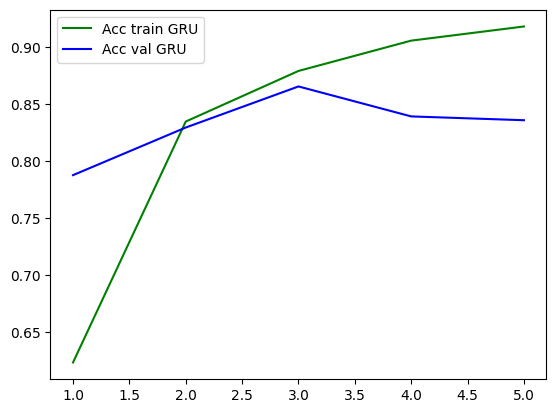

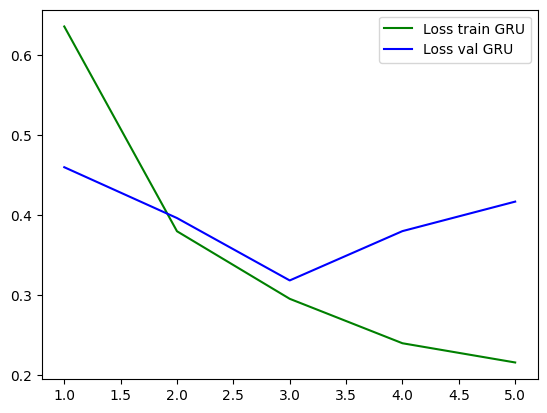

385.95547246932983


In [ ]:
epochs = range(1,6)

plt.plot(epochs, gru_history.history['acc'], 'g', label = 'Acc train GRU')
plt.plot(epochs, gru_history.history['val_acc'], 'b', label = 'Acc val GRU')
plt.legend()
plt.show()

plt.plot(epochs, gru_history.history['loss'], 'g', label = 'Loss train GRU')
plt.plot(epochs, gru_history.history['val_loss'], 'b', label = 'Loss val GRU')
plt.legend()
plt.show()

print(gru_timing)

# Проста LSTM

In [ ]:
lstm_model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
start = time.time()
lstm_history = lstm_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
lstm_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 77s 546ms/step - loss: 0.6096 - acc: 0.6591 - val_loss: 0.4488 - val_acc: 0.8191
Epoch 2/5
137/137 [==============================] - 60s 441ms/step - loss: 0.3734 - acc: 0.8497 - val_loss: 0.4075 - val_acc: 0.8340
Epoch 3/5
137/137 [==============================] - 60s 440ms/step - loss: 0.2765 - acc: 0.8927 - val_loss: 0.3221 - val_acc: 0.8801
Epoch 4/5
137/137 [==============================] - 60s 437ms/step - loss: 0.2356 - acc: 0.9123 - val_loss: 0.2885 - val_acc: 0.8845
Epoch 5/5
137/137 [==============================] - 56s 412ms/step - loss: 0.2066 - acc: 0.9232 - val_loss: 0.3483 - val_acc: 0.8649


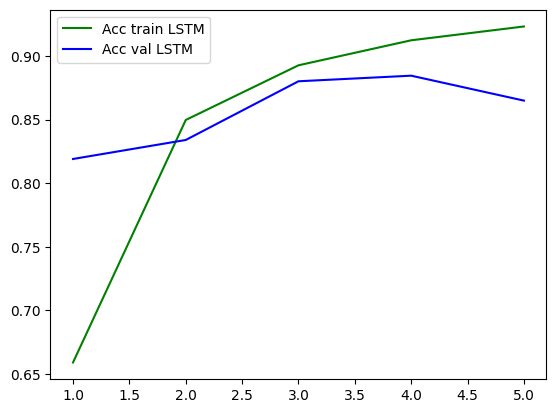

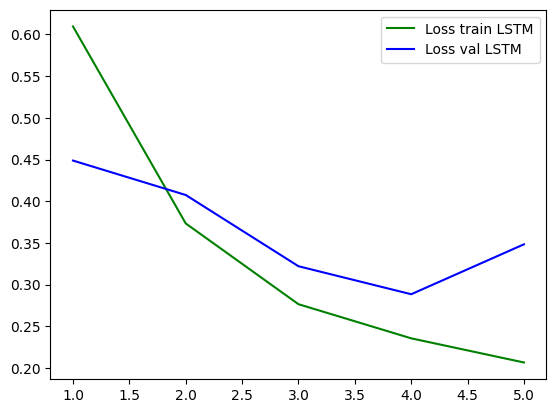

324.15494441986084


In [ ]:
epochs = range(1,6)

plt.plot(epochs, lstm_history.history['acc'], 'g', label = 'Acc train LSTM')
plt.plot(epochs, lstm_history.history['val_acc'], 'b', label = 'Acc val LSTM')
plt.legend()
plt.show()

plt.plot(epochs, lstm_history.history['loss'], 'g', label = 'Loss train LSTM')
plt.plot(epochs, lstm_history.history['val_loss'], 'b', label = 'Loss val LSTM')
plt.legend()
plt.show()

print(lstm_timing)

# Проста SimpleRNN

In [ ]:
simplernn_model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation = 'sigmoid')])

simplernn_model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
simplernn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
simplernn_history = simplernn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
simplernn_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 30s 205ms/step - loss: 0.5577 - acc: 0.7111 - val_loss: 0.3949 - val_acc: 0.8357
Epoch 2/5
137/137 [==============================] - 27s 195ms/step - loss: 0.3630 - acc: 0.8513 - val_loss: 0.3384 - val_acc: 0.8589
Epoch 3/5
137/137 [==============================] - 26s 194ms/step - loss: 0.3327 - acc: 0.8623 - val_loss: 0.3640 - val_acc: 0.8439
Epoch 4/5
137/137 [==============================] - 26s 192ms/step - loss: 0.2604 - acc: 0.9009 - val_loss: 0.3956 - val_acc: 0.8313
Epoch 5/5
137/137 [==============================] - 27s 195ms/step - loss: 0.2161 - acc: 0.9188 - val_loss: 0.3601 - val_acc: 0.8560


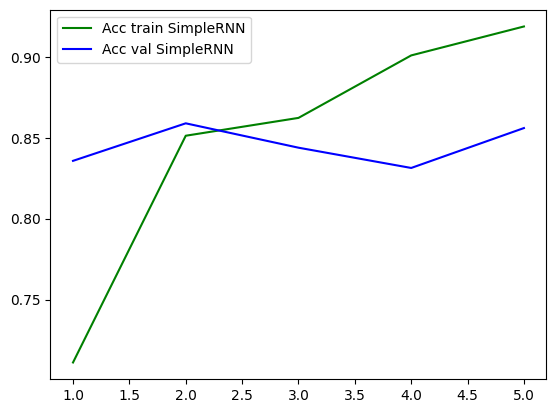

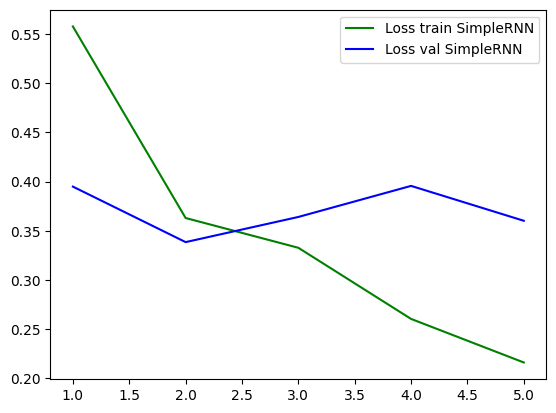

143.93132901191711


In [ ]:
epochs = range(1,6)

plt.plot(epochs, simplernn_history.history['acc'], 'g', label = 'Acc train SimpleRNN')
plt.plot(epochs, simplernn_history.history['val_acc'], 'b', label = 'Acc val SimpleRNN')
plt.legend()
plt.show()

plt.plot(epochs, simplernn_history.history['loss'], 'g', label = 'Loss train SimpleRNN')
plt.plot(epochs, simplernn_history.history['val_loss'], 'b', label = 'Loss val SimpleRNN')
plt.legend()
plt.show()

print(simplernn_timing)

# Bidirectional lstm

In [ ]:
bidirectional_lstm_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM((32))),
    Dense(1, activation = 'sigmoid')])

bidirectional_lstm_model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
bidirectional_lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
bidirectional_lstm_history = bidirectional_lstm_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
bidirectional_lstm_timing = time.time()-start

NameError: ignored

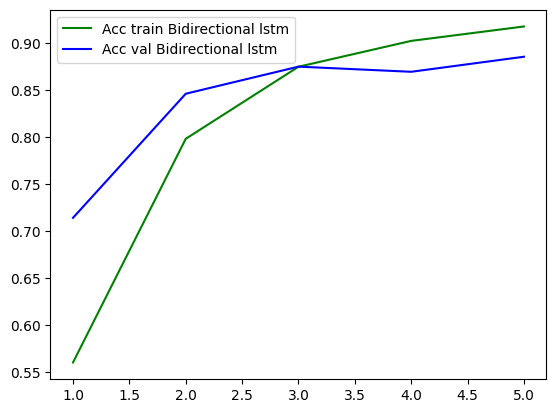

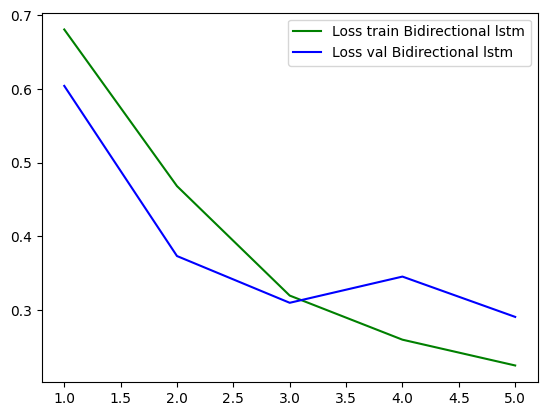

580.3843042850494


In [ ]:
epochs = range(1,6)

plt.plot(epochs, bidirectional_lstm_history.history['acc'], 'g', label = 'Acc train Bidirectional lstm')
plt.plot(epochs, bidirectional_lstm_history.history['val_acc'], 'b', label = 'Acc val Bidirectional lstm')
plt.legend()
plt.show()

plt.plot(epochs, bidirectional_lstm_history.history['loss'], 'g', label = 'Loss train Bidirectional lstm')
plt.plot(epochs, bidirectional_lstm_history.history['val_loss'], 'b', label = 'Loss val Bidirectional lstm')
plt.legend()
plt.show()

print(bidirectional_lstm_timing)

# Bidirectional GRU

In [ ]:
bidirectional_gru_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(SimpleRNN((32))),
    Dense(1, activation = 'sigmoid')])

bidirectional_gru_model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
bidirectional_gru_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                4160      
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 324225 (1.24 MB)
Trainable params: 324225 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
bidirectional_gru_history = bidirectional_gru_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
bidirectional_gru_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 63s 445ms/step - loss: 0.6787 - acc: 0.5542 - val_loss: 0.6385 - val_acc: 0.6319
Epoch 2/5
137/137 [==============================] - 60s 435ms/step - loss: 0.5030 - acc: 0.7754 - val_loss: 0.4148 - val_acc: 0.8239
Epoch 3/5
137/137 [==============================] - 60s 439ms/step - loss: 0.3743 - acc: 0.8445 - val_loss: 0.5023 - val_acc: 0.7735
Epoch 4/5
137/137 [==============================] - 56s 404ms/step - loss: 0.2950 - acc: 0.8821 - val_loss: 0.3720 - val_acc: 0.8391
Epoch 5/5
137/137 [==============================] - 50s 362ms/step - loss: 0.2319 - acc: 0.9101 - val_loss: 0.3607 - val_acc: 0.8543


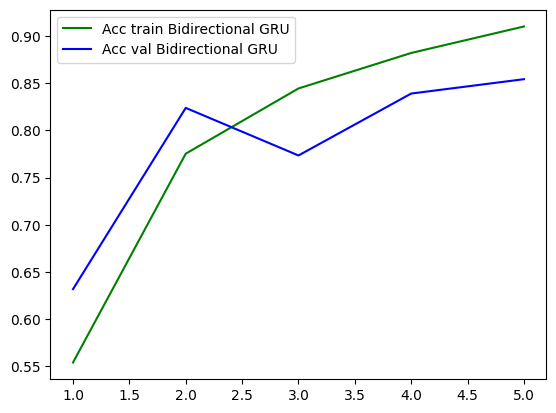

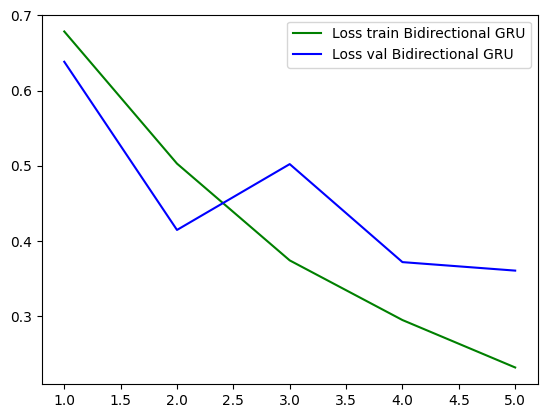

324.8155505657196


In [ ]:
epochs = range(1,6)

plt.plot(epochs, bidirectional_gru_history.history['acc'], 'g', label = 'Acc train Bidirectional GRU')
plt.plot(epochs, bidirectional_gru_history.history['val_acc'], 'b', label = 'Acc val Bidirectional GRU')
plt.legend()
plt.show()

plt.plot(epochs, bidirectional_gru_history.history['loss'], 'g', label = 'Loss train Bidirectional GRU')
plt.plot(epochs, bidirectional_gru_history.history['val_loss'], 'b', label = 'Loss val Bidirectional GRU')
plt.legend()
plt.show()

print(bidirectional_gru_timing)

# Bidirectional SimpleRNN

In [ ]:
bidirectional_simplernn_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(SimpleRNN((32))),
    Dense(1, activation = 'sigmoid')])

bidirectional_simplernn_model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
bidirectional_simplernn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                12672     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 332737 (1.27 MB)
Trainable params: 332737 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
bidirectional_simplernn_history = bidirectional_simplernn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
bidirectional_simplernn_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 109s 760ms/step - loss: 0.6668 - acc: 0.5889 - val_loss: 0.4903 - val_acc: 0.7688
Epoch 2/5
137/137 [==============================] - 105s 768ms/step - loss: 0.4115 - acc: 0.8179 - val_loss: 0.3622 - val_acc: 0.8404
Epoch 3/5
137/137 [==============================] - 102s 746ms/step - loss: 0.3083 - acc: 0.8754 - val_loss: 0.3500 - val_acc: 0.8472
Epoch 4/5
137/137 [==============================] - 103s 750ms/step - loss: 0.2558 - acc: 0.9013 - val_loss: 0.3314 - val_acc: 0.8603
Epoch 5/5
137/137 [==============================] - 104s 760ms/step - loss: 0.2318 - acc: 0.9098 - val_loss: 0.3416 - val_acc: 0.8680


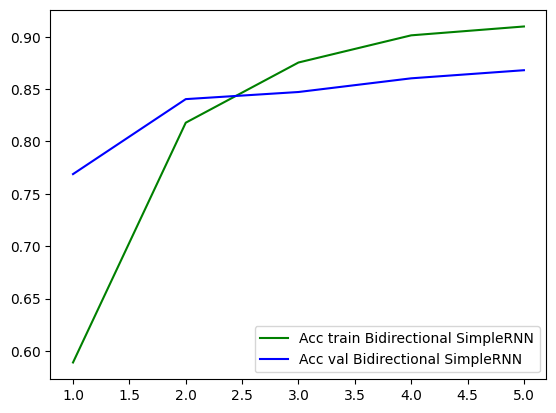

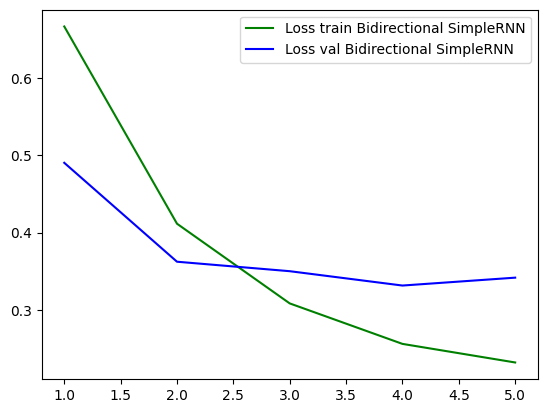

566.4252638816833


In [ ]:
epochs = range(1,6)

plt.plot(epochs, bidirectional_simplernn_history.history['acc'], 'g', label = 'Acc train Bidirectional SimpleRNN')
plt.plot(epochs, bidirectional_simplernn_history.history['val_acc'], 'b', label = 'Acc val Bidirectional SimpleRNN')
plt.legend()
plt.show()

plt.plot(epochs, bidirectional_simplernn_history.history['loss'], 'g', label = 'Loss train Bidirectional SimpleRNN')
plt.plot(epochs, bidirectional_simplernn_history.history['val_loss'], 'b', label = 'Loss val Bidirectional SimpleRNN')
plt.legend()
plt.show()

print(bidirectional_simplernn_timing)

# Deep BRRN на основі LSTM

In [ ]:
deep_bidirectional_lstm_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM((32))),
    Dense(1, activation = 'sigmoid')])

deep_bidirectional_lstm_model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
deep_bidirectional_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, None, 64)          16640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
start = time.time()
deep_bidirectional_lstm_history = deep_bidirectional_lstm_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
deep_bidirectional_lstm_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 234s 2s/step - loss: 0.5751 - acc: 0.6808 - val_loss: 0.4553 - val_acc: 0.7872
Epoch 2/5
137/137 [==============================] - 218s 2s/step - loss: 0.3444 - acc: 0.8569 - val_loss: 0.3872 - val_acc: 0.8360
Epoch 3/5
137/137 [==============================] - 213s 2s/step - loss: 0.2614 - acc: 0.9010 - val_loss: 0.3103 - val_acc: 0.8705
Epoch 4/5
137/137 [==============================] - 215s 2s/step - loss: 0.2169 - acc: 0.9184 - val_loss: 0.3022 - val_acc: 0.8856
Epoch 5/5
137/137 [==============================] - 193s 1s/step - loss: 0.1830 - acc: 0.9340 - val_loss: 0.4383 - val_acc: 0.8375


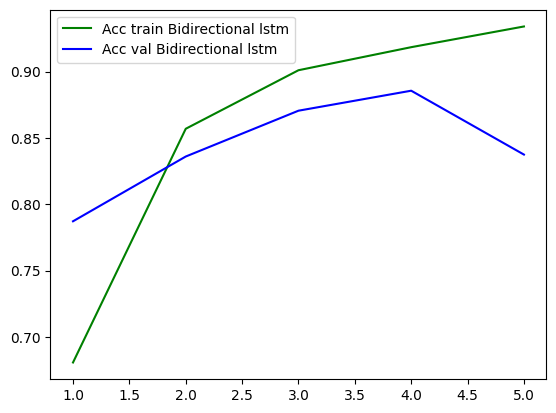

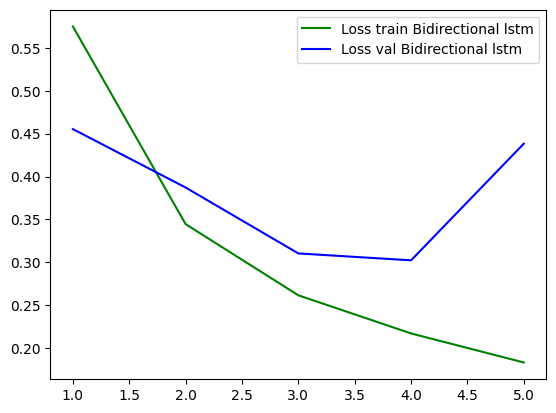

1072.3801627159119


In [ ]:
epochs = range(1,6)

plt.plot(epochs, deep_bidirectional_lstm_history.history['acc'], 'g', label = 'Acc train Bidirectional lstm')
plt.plot(epochs, deep_bidirectional_lstm_history.history['val_acc'], 'b', label = 'Acc val Bidirectional lstm')
plt.legend()
plt.show()

plt.plot(epochs, deep_bidirectional_lstm_history.history['loss'], 'g', label = 'Loss train Bidirectional lstm')
plt.plot(epochs, deep_bidirectional_lstm_history.history['val_loss'], 'b', label = 'Loss val Bidirectional lstm')
plt.legend()
plt.show()

print(deep_bidirectional_lstm_timing)

# Deep BRRN на основі GRU

In [ ]:
deep_bidirectional_gru_model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM((32))),
    Dense(1, activation = 'sigmoid')])

deep_bidirectional_gru_model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
deep_bidirectional_gru_model.summary()

In [ ]:
start = time.time()
deep_bidirectional_gru_history = deep_bidirectional_ls_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
deep_bidirectional_lstm_timing = time.time()-start

Epoch 1/5
137/137 [==============================] - 220s 2s/step - loss: 0.6525 - acc: 0.5939 - val_loss: 0.4858 - val_acc: 0.7691
Epoch 2/5
137/137 [==============================] - 206s 2s/step - loss: 0.4175 - acc: 0.8123 - val_loss: 0.3797 - val_acc: 0.8377
Epoch 3/5
137/137 [==============================] - 198s 1s/step - loss: 0.3318 - acc: 0.8632 - val_loss: 0.3549 - val_acc: 0.8491
Epoch 4/5
137/137 [==============================] - 199s 1s/step - loss: 0.2816 - acc: 0.8906 - val_loss: 0.3601 - val_acc: 0.8533
Epoch 5/5
137/137 [==============================] - 199s 1s/step - loss: 0.2488 - acc: 0.9046 - val_loss: 0.3378 - val_acc: 0.8619


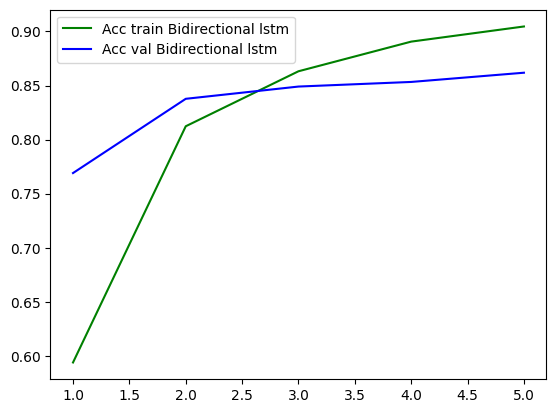

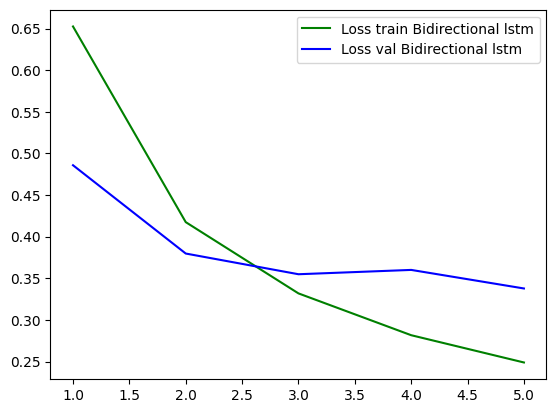

1022.7219891548157


In [ ]:
epochs = range(1,6)

plt.plot(epochs, deep_bidirectional_lstm_history.history['acc'], 'g', label = 'Acc train Bidirectional lstm')
plt.plot(epochs, deep_bidirectional_lstm_history.history['val_acc'], 'b', label = 'Acc val Bidirectional lstm')
plt.legend()
plt.show()

plt.plot(epochs, deep_bidirectional_lstm_history.history['loss'], 'g', label = 'Loss train Bidirectional lstm')
plt.plot(epochs, deep_bidirectional_lstm_history.history['val_loss'], 'b', label = 'Loss val Bidirectional lstm')
plt.legend()
plt.show()

print(deep_bidirectional_lstm_timing)

# Висновки

Якщо співвідносити час витрачений на навчання і результат роботи моделі, то з простих найкраще себе проявила модель SimpleRNN, яка на тестових даних показала результат 86% і найменшу частку перенавчання, до того ж ця модель навчилась швидше за інші.

Для конкретно цього завдання Bidirectional не сильно повпливала на точність роботи моделей, лише трохи кращим став результат роботи LSTM, але зважаючи на те, що навчання зайняло більше часу це покращення не є суттєвим

Під час глибокого навчання GRUстало показувати кращі результати, але вони не перевершили результати SimpleRNN. Робота LSTM погіршилась і зв='явились явні ознаки перенавчання

Підсумувавши отримані дані можна зробити висновок, що оптимальною моделю для цього завдання стала SimpleRNN. Ускладнення архітектури не призвело до суттєвих покращень роботи моделей

Покращувати надалі роботу моделей можна зміною гіперпараметрів